# Предобработка данных

In [253]:
import pandas as pd
import numpy as np
import subfunc as sf
from impyute.imputation.cs import mice

In [254]:
RAW_DATA = 'data/evras.csv'
POST_PROCESSING_DATA = 'data/post_evras.csv'
SOURCE_DATA = 'source/'
pd.options.display.max_columns = 90
target_columns = ['химшлак последний Al2O3',
                  'химшлак последний CaO',
                  'химшлак последний R',
                  'химшлак последний SiO2']

Информация о данных

In [255]:
data = pd.read_csv(RAW_DATA, sep=';', index_col='index', decimal=',')
data.describe(include='all')

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041,7041,7041,7041,6444.000000,6440.000000,6440.000000,6444.000000,5249.000000,6435.000000,5883.000000,6431.000000,6431.000000,6178.000000,6436.000000,6436.000000,6426.000000,1389.000000,6440.000000,6444.000000,6444.000000,6444.0,6444.0,6426.000000,1389.000000,724.000000,4770.000000,13.00,6422.000000,7.000000,6307.000000,5910.000000,6244.000000,33.000000,5.000000,383.000000,6179.000000,6400.000000,82.000000,6398.000000,1017.000000,5883.000000,6440.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6443.000000,6443.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6218.000000,6444.000000,6444.000000,6444.000000,6444.000000,6442.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000
unique,7041,7041,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,г683863?:>6,2070-07-24 20:09:00,Э76ХФ,Р65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4953,6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,26.492241,46.194099,21.010523,46.063051,3.004414,0.403088,0.117692,0.139068,0.130561,0.051366,1567.771753,1587.973897,11.593261,13.227743,12989.038791,114.404252,1.009001,1.0,1.0,15.450528,10.547284,0.020862,0.132179,0.02,0.066706,0.385714,0.420162,0.054730,0.020086,0.019429,0.044000,0.023845,0.061368,0.143436,0.039869,0.215540,0.026624,0.208039,4557.236180,0.001782,0.466162,0.273289,0.101999,0.672277,0.007049,0.009971,0.07099

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            7041 non-null   object 
 1   DT                              7041 non-null   object 
 2   МАРКА                           7041 non-null   object 
 3   ПРОФИЛЬ                         7041 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

Нахождение самой популярной марки

In [257]:
top_mark = data.describe(include='all').loc["top", "МАРКА"]
print("Самая популярная марка - ", top_mark)

Самая популярная марка -  Э76ХФ


Процент пропущенных значений в датасете

In [258]:
data.isnull().sum().sort_values(ascending= False).apply(lambda x : x / data.shape[0])[:15]

ферспл FeSi-75                0.999290
сыпуч  кокс. мелочь (сух.)    0.999006
сыпуч кварцит                 0.998154
ферспл FeMo                   0.995313
ферспл  Ni H1 пласт.          0.988354
ферспл FeV азот.              0.945604
расход C пров.                0.897174
ферспл  ферванит              0.855560
расход газ  N2                0.802727
N2 (интенс.)                  0.802727
химшлак последний SiO2        0.326516
химшлак последний Al2O3       0.326516
химшлак первый SiO2_1         0.326516
химшлак первый Al2O3_1        0.326516
сыпуч известь РП              0.322539
dtype: float64

Перевод даты во время изготовления сплава

In [259]:
data['DT'] = sf.date_to_interval(data['DT'])

Оставляем колонки с > 65% известных данных

In [260]:
dropped_data = sf.drop_columns(data,0.65)

Удаленные колонки: N2 (интенс.), расход газ  N2, расход C пров., сыпуч кварцит, сыпуч  кокс. мелочь (сух.), ферспл FeMo, ферспл FeSi-75, ферспл FeV азот., ферспл  Ni H1 пласт., ферспл  ферванит


In [261]:
#part_nan = dropped_data.isnull().sum().sort_values(ascending= False).apply(lambda x : x / data.shape[0])

Зануляем показатели трети хим анализа

In [262]:
listd = []
for column in data.columns:
    if 'хим' in column:
        listd.append(column)

In [263]:
dropped_data[listd] = dropped_data[listd].fillna(0)

c:\program files\python37\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [264]:
str_columns = ['ПРОФИЛЬ', 'МАРКА', 'nplv', 'DT']
all_columns = dropped_data.columns.to_list()
result_columns = list(set(all_columns) - set(str_columns))

In [290]:
#dropped_data[result_columns].fillna(dropped_data[result_columns].mode(axis=0), inplace=True)
dropped_data[result_columns].mean(axis=0)

химсталь первый Al_1            0.001631
эл. энергия                  4557.236180
химсталь первый C_1             0.426637
ПСН гр.                         3.004414
чист расход V                   0.051366
                                ...     
чист расход C                   0.403088
химсталь последний Mo           0.005724
химшлак последний FeO           0.536060
произв  количество плавок       1.000000
чист расход Si                  0.130561
Length: 70, dtype: float64

In [265]:
#dropped_data.fillna(your_func(dropped_data))

In [266]:
#dropped_data[result_columns] = dropped_data[result_columns].fillna(
#    dropped_data.groupby('МАРКА')[result_columns].transform('mean')
#)

In [267]:
#dropped_data

In [268]:
dropped_data.isnull().sum().sort_values(ascending= False)

сыпуч известь РП          2271
ПСН гр.                   1792
ферспл  фх850А            1158
чист расход Cr            1158
сыпуч  шпат плав.         1131
                          ... 
химсталь последний Al        0
химсталь последний C         0
химсталь последний Ca        0
химсталь последний Cr        0
химшлак последний SiO2       0
Length: 74, dtype: int64

One-hot encoding

In [269]:
unique_marks = np.unique(dropped_data['МАРКА'], return_counts=True)



In [270]:
dropped_data = pd.get_dummies(dropped_data, columns=['МАРКА'])

In [271]:
# не влияет на процесс
np.unique(dropped_data['ПРОФИЛЬ'], return_counts=True)
dropped_data = dropped_data.drop(columns=['nplv', 'ПРОФИЛЬ'])

In [272]:
dropped_data = dropped_data.apply(lambda x: pd.to_numeric(x))


c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


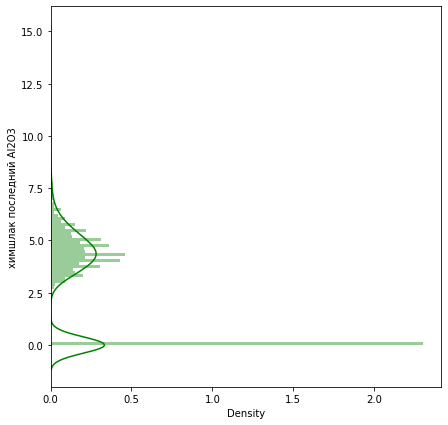

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний Al2O3'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
#plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_1.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


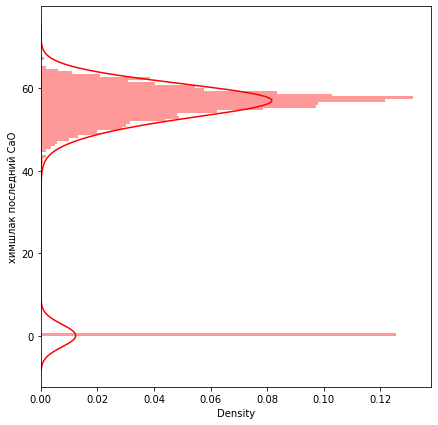

In [274]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний CaO'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
#plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_2.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


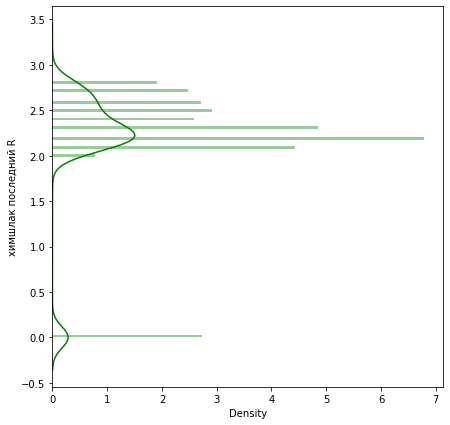

<Figure size 432x288 with 0 Axes>

In [275]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний R'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_3.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


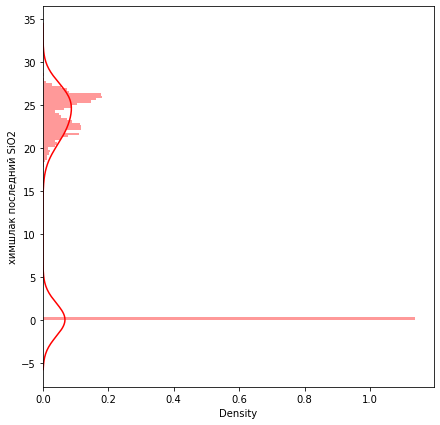

<Figure size 432x288 with 0 Axes>

In [276]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний SiO2'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_4.png')

In [277]:
corr_data = dropped_data.drop(columns=target_columns).corr()

#plt.figure(figsize=(52, 50))

#sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
            #cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            #annot=True, annot_kws={"size": 8}, square=True)
#plt.savefig(f'{SOURCE_DATA}correletion_map.png')

In [278]:
corr_data

,DT,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,МАРКА_09Г2С,МАРКА_900А,МАРКА_G2HH,МАРКА_R260,МАРКА_R350HT,МАРКА_НХ,МАРКА_С255,МАРКА_С345,МАРКА_С355,МАРКА_Ст3сп,МАРКА_Ш2.2,МАРКА_Ш2Л,МАРКА_Э73Ф,МАРКА_Э76,МАРКА_Э76Ф,МАРКА_Э76ХАФ,МАРКА_Э76ХФ,МАРКА_Э90ХАФ
DT,1.000000,-0.119729,0.216299,0.196424,0.220036,0.021875,0.081285,0.043744,0.115790,0.117352,0.024297,0.063264,0.165039,0.021204,0.029184,-0.075099,0.046684,NaN,NaN,0.122654,0.231290,0.023887,0.066767,-0.026760,-0.002376,0.024720,0.087295,0.115410,0.044527,0.198088,-0.058974,-0.065939,-0.053561,-0.057697,-0.068646,-0.045316,-0.053985,-0.055140,-0.053372,-0.047556,-0.065803,-0.054339,-0.021940,-0.037312,-0.064741,-0.023543,-0.052189,-0.057806,-0.065225,-0.040481,-0.052128,-0.052625,-0.053818,-0.055173,-0.065037,-0.065293,-0.038043,-0.027247,-0.067023,-0.003318,-0.034558,0.019173,-0.066500,-0.026470,-0.035058,-0.034655,-0.017884,-0.000757,0.000903,0.003058,-0.000937,-0.002163,0.000087,0.019862,-0.000096,-0.000551,-0.000869,0.007616,0.010099,-0.002039,0.178522,-0.000906,-0.000993,-0.031221,-0.006930
t вып-обр,-0.119729,1.000000,-0.055413,0.003659,-0.056211,0.093821,0.083991,-0.062887,-0.075377,-0.032539,0.098536,-0.337524,-0.172695,-0.042869,0.112598,0.068875,-0.041645,NaN,NaN,-0.103736,-0.086261,0.030157,0.069206,-0.053436,0.019847,0.102809,-0.013796,-0.072920,-0.058243,0.032339,0.060558,-0.023048,-0.007627,-0.013743,0.047588,0.020030,0.007419,0.016289,0.070275,-0.077191,0.022114,0.036363,-0.015313,0.001513,0.099971,0.013404,-0.016171,-0.015128,-0.029051,0.018155,0.111954,0.013859,0.091081,-0.018256,0.019866,0.044922,0.083697,0.133245,-0.040114,-0.014192,-0.036723,-0.023563,-0.046405,0.103305,-0.019597,-0.058165,-0.053616,-0.017202,-0.011290,0.021111,0.049772,-0.019345,-0.030297,-0.016363,-0.007114,-0.015523,NaN,-0.033098,0.002983,-0.024243,0.008412,-0.017216,-0.005555,-0.069580,0.099198
t обработка,0.216299,-0.055413,1.000000,0.594447,0.993280,0.049362,0.094720,0.023715,0.084258,0.102788,0.045744,0.018780,0.185289,-0.070279,0.003722,-0.032824,0.437613,NaN,NaN,0.311345,0.196115,0.076509,0.063546,-0.007495,0.014172,0.044286,0.082691,0.085311,0.023729,0.551829,-0.042502,-0.100402,-0.041968,0.011212,-0.062134,-0.002150,0.021131,0.034488,-0.014482,0.033254,-0.069273,-0.058790,-0.019479,0.028841,0.015419,-0.009351,-0.030770,0.010493,0.003271,0.004972,0.061579,0.044719,0.005545,-0.084377,-0.062279,-0.088109,0.010273,-0.001205,-0.029977,0.054176,0.040059,0.114437,-0.033602,-0.010036,0.000931,0.037027,0.081112,0.033650,0.011661,0.017791,0.017348,0.008267,0.009020,0.027595,-0.002948,-0.001864,NaN,0.020930,0.073784,-0.000396,0.025548,-0.005826,0.038342,-0.067210,0.034844
t под током,0.196424,0.003659,0.594447,1.000000,0.598426,0.340629,0.007994,0.046010,0.069873,-0.020739,0.048464,-0.417644

In [279]:
useless_list = []
for ind in corr_data.index:
    for col in corr_data.columns:
        if ind != col and abs(corr_data.loc[ind, col] >= 0.9 ):
            if [col, ind, corr_data.loc[ind, col]] not in useless_list:
                useless_list.append([ind, col, corr_data.loc[ind, col]])

useless_list

[['t обработка', 't продувка', 0.9932799393794185],
 ['t под током', 'эл. энергия', 0.9593605817812976],
 ['чист расход C', 'сыпуч  кокс. мелочь КМ1', 0.9188081746193666],
 ['чист расход Cr', 'ферспл  фх850А', 0.9982044712612745],
 ['чист расход Mn', 'ферспл SiMn18', 0.9984458945886303],
 ['чист расход Si', 'ферспл  Mn5Si65Al0.5', 0.9356896455326765],
 ['чист расход V', 'ферспл  FeV-80', 0.9957128344373597],
 ['чист расход V', 'химсталь последний V', 0.9938690754611055],
 ['чист расход V', 'МАРКА_Э90ХАФ', 0.9884229263880203],
 ['ферспл  FeV-80', 'химсталь последний V', 0.98815976771277],
 ['ферспл  FeV-80', 'МАРКА_Э90ХАФ', 0.9842623170180844],
 ['химсталь первый Cr_1', 'химсталь последний Cr', 0.977136964272215],
 ['химсталь первый Cu_1', 'химсталь последний Cu', 0.9984710661849621],
 ['химсталь первый Mn_1', 'химсталь последний C', 0.9264995333133735],
 ['химсталь первый Mn_1', 'химсталь последний Mn', 0.9753557432980768],
 ['химсталь первый Mn_1', 'химшлак первый CaO_1', 0.9300041154

In [280]:
useless_list = np.array(useless_list)

In [281]:
dropped_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)

In [282]:
dropped_data[useless_list[-2, 0:2]]

,химшлак первый Al2O3_1,химшлак первый SiO2_1
index,,
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
7036,5.6,22.2
7037,5.1,24.5
7038,7.8,20.0


In [283]:
for pair in range(len(useless_list)):
    print((dropped_data[useless_list[pair, 0:2]] == 0).sum(axis=0))


t обработка    0
t продувка     0
dtype: int64
t под током    0
эл. энергия    0
dtype: int64
чист расход C              0
сыпуч  кокс. мелочь КМ1    0
dtype: int64
чист расход Cr    0
ферспл  фх850А    0
dtype: int64
чист расход Mn    0
ферспл SiMn18     0
dtype: int64
чист расход Si          0
ферспл  Mn5Si65Al0.5    0
dtype: int64
чист расход V     0
ферспл  FeV-80    0
dtype: int64
чист расход V             0
химсталь последний V    597
dtype: int64
чист расход V       0
МАРКА_Э90ХАФ     5657
dtype: int64
ферспл  FeV-80            0
химсталь последний V    597
dtype: int64
ферспл  FeV-80       0
МАРКА_Э90ХАФ      5657
dtype: int64
химсталь первый Cr_1     597
химсталь последний Cr    597
dtype: int64
химсталь первый Cu_1     597
химсталь последний Cu    597
dtype: int64
химсталь первый Mn_1    597
химсталь последний C    597
dtype: int64
химсталь первый Mn_1     597
химсталь последний Mn    597
dtype: int64
химсталь первый Mn_1    597
химшлак первый CaO_1    597
dtype: int64
химста

In [284]:
dropped_data[['ферспл  FeV-80','МАРКА_Э90ХАФ'  ]].sample(25)

,ферспл FeV-80,МАРКА_Э90ХАФ
index,,
823,0.051577,0
4769,0.049841,0
1299,0.101852,1
4212,0.050709,0
6534,0.050347,0
2581,0.049045,0
1863,0.048864,0
3399,0.050926,0
3329,0.105794,1


In [285]:
dropped_data.isnull().sum()

DT                0
t вып-обр       597
t обработка     601
t под током     601
t продувка      597
               ... 
МАРКА_Э76         0
МАРКА_Э76Ф        0
МАРКА_Э76ХАФ      0
МАРКА_Э76ХФ       0
МАРКА_Э90ХАФ      0
Length: 89, dtype: int64

In [286]:
#mark_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)